#### Importer le bibliothéque

In [178]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder

from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense , Conv2D  , MaxPool2D , Flatten , Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

#### Importer le dataset

In [179]:
(x_train , y_train) , (x_test , y_test) = cifar10.load_data()

#### Analyser le dataset

In [180]:
x_train.shape , x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [181]:
x_train  = x_train / 255
x_test = x_test /255

In [182]:
class_names = [
    'airplane',   # 0
    'automobile', # 1
    'bird',       # 2
    'cat',        # 3
    'deer',       # 4
    'dog',        # 5
    'frog',       # 6
    'horse',      # 7
    'ship',       # 8
    'truck'       # 9
]


In [183]:
classes_uniques = np.unique(y_train)
for i in classes_uniques:
    print(f"{i} → {class_names[i]}")

0 → airplane
1 → automobile
2 → bird
3 → cat
4 → deer
5 → dog
6 → frog
7 → horse
8 → ship
9 → truck


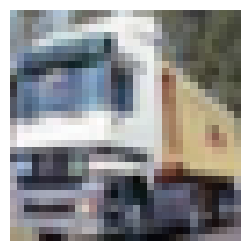

In [184]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))  # plus grand affichage
plt.imshow(x_train[1], interpolation='nearest')  # pas de flou
#plt.title(f"Classe : {class_names[y_train[1][0]]}")
plt.axis('off')
plt.show()


In [185]:
n_class = len(np.unique(y_train))
n_class

10

In [186]:
### transformer la variable cible en catégoriales(one_hot_encoder)
y_train_cat = to_categorical(y_train, n_class)
y_test_cat = to_categorical(y_test,n_class )

In [187]:
### Creer un model 

model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),         
    Dropout(0.25),               

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),                 
    Dense(n_class, activation='softmax')
])



In [188]:
## compilation du model
model.compile(optimizer=Adam(learning_rate=0.001) , loss ='categorical_crossentropy' , metrics=['accuracy'])

In [189]:
### Entrainer le model 

history = model.fit(x_train , y_train_cat , epochs=50)

Epoch 1/50
1563/1563 [==============================] - 57s 35ms/step - loss: 1.7414 - accuracy: 0.4151
Epoch 2/50
1563/1563 [==============================] - 54s 34ms/step - loss: 1.3115 - accuracy: 0.5376
Epoch 3/50
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1756 - accuracy: 0.5882
Epoch 4/50
1563/1563 [==============================] - 54s 35ms/step - loss: 1.0851 - accuracy: 0.6209
Epoch 5/50
1563/1563 [==============================] - 54s 34ms/step - loss: 1.0207 - accuracy: 0.6446
Epoch 6/50
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9746 - accuracy: 0.6618
Epoch 7/50
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9389 - accuracy: 0.6745
Epoch 8/50
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8997 - accuracy: 0.6883
Epoch 9/50
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8727 - accuracy: 0.6977
Epoch 10/50
1563/1563 [==============================] - 59s 37m

In [190]:
### Evaluation du model 

loss_tess , accuracy_test = model.evaluate(x_test , y_test_cat)

313/313 [==============================] - 4s 10ms/step - loss: 0.6819 - accuracy: 0.7792


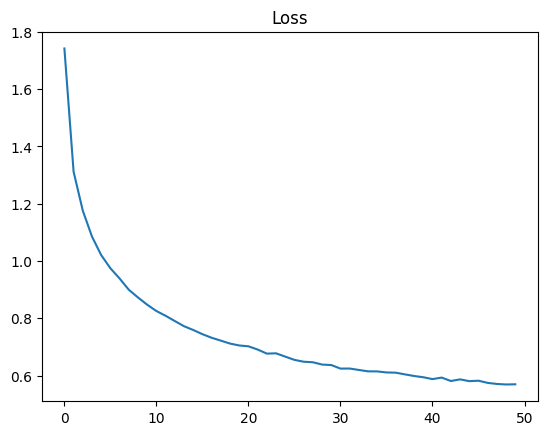

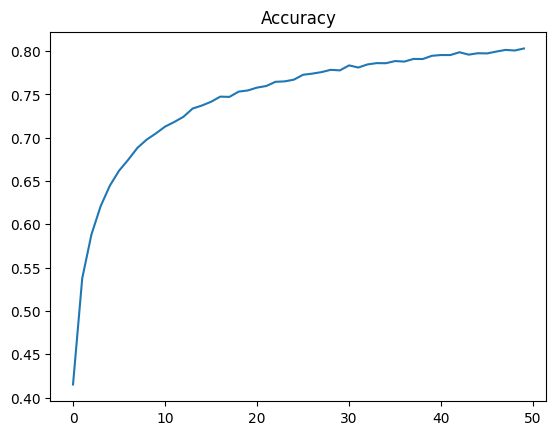

In [191]:
### Tracer la courbe de loss et accuracy du train 

### Graphe loss et accuracy 
loss_train = history.history["loss"]
accuracy_train = history.history["accuracy"]

plt.plot(loss_train)
plt.title("Loss")
plt.show()
plt.plot(accuracy_train)
plt.title("Accuracy")
plt.show()